In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from datetime import datetime
import matplotlib.pyplot as plt

# Tạo SparkSession kết nối với MongoDB
spark = SparkSession.builder \
    .appName("Twitter Sentiment Dashboard") \
    .config("spark.jars.packages",
            "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0") \
    .config("spark.mongodb.input.uri", "mongodb://customdockerfile-mongo-1:27017/twitter_data.worldcup") \
    .getOrCreate()



Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
:: loading settings :: url = jar:file:/usr/local/lib/python3.7/dist-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-b8b2afdd-9846-413b-8b60-d15cd57e7c98;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.0 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 238ms :: artifacts dl 5ms
	:: modules in use:
	org.mongodb#bson;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-core;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-sync;4.0.5 from central in [default]
	org.mongodb.spark#mongo-spark-connector_2.12;3.0.0 from central in [default]
	-

In [2]:
# Đọc dữ liệu từ MongoDB
df_spark = spark.read.format("mongo").load()

# Chuyển đổi Spark DataFrame thành Pandas DataFrame
df = df_spark.toPandas()

# Chuyển cột timestamp thành định dạng datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Kiểm tra dữ liệu
print(df.head())

                           _id  prediction  \
0  (67459bb9ea7fe745880daa68,)         1.0   
1  (67459bb9ea7fe745880daa6a,)         1.0   
2  (67459bb9ea7fe745880daa6b,)         1.0   
3  (67459bb9ea7fe745880daa6c,)         1.0   
4  (67459bb9ea7fe745880daa6d,)         1.0   

                                                text           timestamp  
0  About last night… 💚\n\nFirst of the group and ... 1970-01-20 01:57:22  
1  The Best moment of T20WorldCup.\n\nINDvUSA Wor... 1970-01-20 21:17:42  
2  Supporting my friends in South America 🇦🇷 let’... 1970-01-20 08:03:36  
3  Lovely to have this guy in the panel. World Cu... 1970-01-20 21:08:03  
4  📣𝗚𝗜𝗩𝗘𝗔𝗪𝗔𝗬 𝗔𝗟𝗘𝗥𝗧🎉\nRs. 500 Amazon Voucher to 1 ... 1970-01-20 21:11:52  


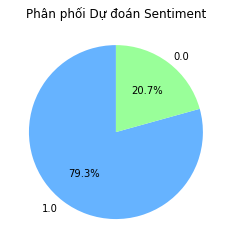

In [3]:
# Biểu đồ 1: Phân phối sentiment
sentiment_counts = df['prediction'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                      colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.title("Phân phối Dự đoán Sentiment")
plt.ylabel("")
plt.show()

In [4]:
# Tính độ dài của text
df['length'] = df['text'].str.len()

# Lấy top 10 tweets dài nhất
top_10_longest = df.nlargest(10, 'length')

# In ra ID, nội dung tweet và prediction
print("Top 10 Tweets Dài Nhất và Prediction:")
print(top_10_longest[['text', 'length', 'prediction']])


Top 10 Tweets Dài Nhất và Prediction:
                                                 text  length  prediction
9   The new Moulay Abdellah stadium in Rabat , Mor...     254         0.0
4   📣𝗚𝗜𝗩𝗘𝗔𝗪𝗔𝗬 𝗔𝗟𝗘𝗥𝗧🎉\nRs. 500 Amazon Voucher to 1 ...     253         1.0
20  I can’t express my gratitude and happiness for...     253         1.0
26  Morocco's campaign to kill 3 million dogs for ...     237         1.0
27  𝗙𝗧 | 🇰🇵 DPR Korea 0️⃣-1️⃣ Uzbekistan 🇺🇿\n\nThe...     229         1.0
3   Lovely to have this guy in the panel. World Cu...     178         1.0
5   FT England 0-0 USA.\n\nWatch the moment fans i...     147         1.0
0   About last night… 💚\n\nFirst of the group and ...     145         1.0
17  3 days, 4 matches, a ton of laughs and countle...     136         1.0
11  Holland and Argentina line-up ahead of the Wor...     126         1.0


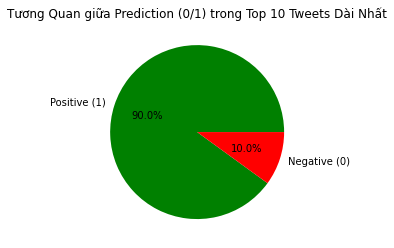

In [5]:
# Tính độ dài của text
df['length'] = df['text'].str.len()

# Lấy top 10 tweets dài nhất
top_10_longest = df.nlargest(10, 'length')

# Đếm số lượng 0 và 1 trong cột prediction cho top 10
prediction_counts = top_10_longest['prediction'].value_counts()

# Vẽ biểu đồ tròn thể hiện tương quan giữa prediction 0 và 1
prediction_counts.plot(kind='pie', labels=["Positive (1)", "Negative (0)"], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Tương Quan giữa dự đoán (0/1) trong Top 10 Tweets Dài Nhất")
plt.ylabel("")  # Ẩn nhãn trục y
plt.show()


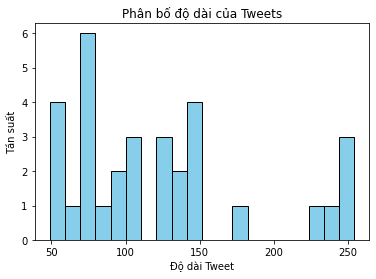

In [6]:
df['length'] = df['text'].str.len()
df['length'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Phân bố độ dài của Tweets")
plt.xlabel("Độ dài Tweet")
plt.ylabel("Tần suất")
plt.show()


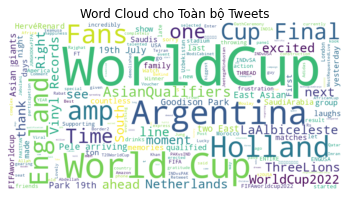

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud cho Toàn bộ Tweets")
plt.show()


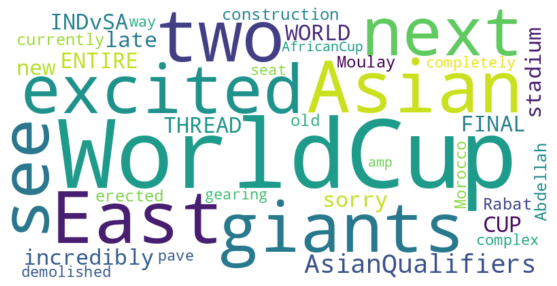

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Giả sử df là DataFrame của bạn
df_filtered = df[df['prediction'] == 0]
text = " ".join(df_filtered['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt hiển thị trục
plt.show()


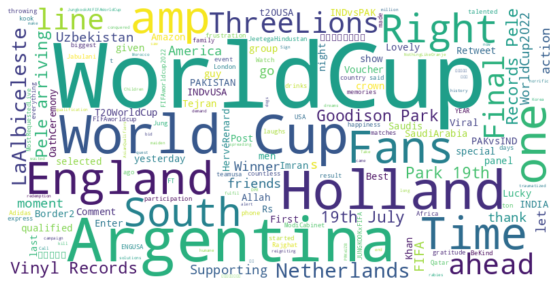

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Giả sử df là DataFrame của bạn
df_filtered = df[df['prediction'] == 1]
text = " ".join(df_filtered['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt hiển thị trục
plt.show()


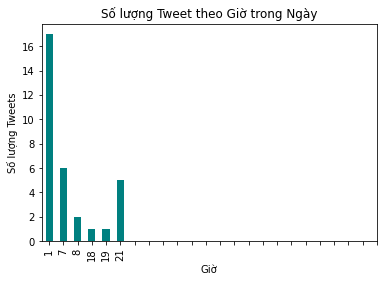

In [9]:
df['hour'] = df['timestamp'].dt.hour
tweet_by_hour = df.groupby('hour').size()
tweet_by_hour.plot(kind='bar', color='teal')
plt.title("Số lượng Tweet theo Giờ trong Ngày")
plt.xlabel("Giờ")
plt.ylabel("Số lượng Tweets")
plt.xticks(range(24))
plt.show()


!pip install --upgrade Pillow
!pip install --upgrade pip


